# **Project Name**    - Paisabazaar Banking Fraud Analysis Exploratpry Data Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

The purpose of this project was to build a machine learning model capable of predicting customer credit score categories (Good, Poor, Standard) using financial, demographic, and behavioral data. Credit score prediction is critical in the banking and financial sector since it directly impacts lending decisions, risk assessment, and business profitability. Incorrectly classifying a high-risk customer as a good customer could lead to loan defaults, while wrongly rejecting a good customer may result in lost business opportunities. Therefore, the objective of this study was to develop a robust model that ensures fair, accurate, and reliable classification of creditworthiness.

Data Preprocessing and Cleaning

The raw dataset contained missing values, outliers, and categorical variables that required significant preprocessing. Missing values were treated using imputation techniques (mean/median for numerical variables, mode for categorical features). Outliers were detected and handled to ensure they did not distort model performance. Non-numeric categorical variables such as Credit Mix and Payment Behaviour were converted into numerical form using encoding methods. Additionally, new features were engineered, such as Debt-to-Income Ratio and EMI-to-Salary Ratio, which added financial insights and improved the model’s predictive ability.

Feature Engineering and Selection

To avoid multicollinearity and overfitting, feature correlations were examined using a heatmap, and highly correlated features were removed. Feature selection was performed using Recursive Feature Elimination (RFE) and Random Forest Feature Importance methods. This ensured that only the most relevant variables were retained for modeling, reducing computational cost and improving accuracy. The most influential features identified included Annual Income, Outstanding Debt, Credit Utilization Ratio, Payment Behaviour, Number of Credit Inquiries, and Monthly Balance.

Data Transformation and Dimensionality Reduction

Since machine learning models often perform better on scaled data, transformations such as Standard Scaling and Normalization were applied. Dimensionality reduction using Principal Component Analysis (PCA) was explored to capture maximum variance while minimizing redundancy in the dataset. This step helped simplify the data without losing critical information, making the training process more efficient.

Handling Class Imbalance

Credit score data was inherently imbalanced, with more samples belonging to one class compared to others. To address this issue, SMOTE (Synthetic Minority Over-sampling Technique) was applied. SMOTE created synthetic examples of minority classes, balancing the dataset and improving the model’s ability to correctly classify all categories rather than being biased toward the majority class.

Model Implementation

Three models were implemented and compared:

Logistic Regression – Served as the baseline model. It offered interpretability and provided insights into the relationship between features and the target variable.

Random Forest Classifier – Improved performance by leveraging ensemble learning. It also provided feature importance scores, highlighting which variables were most influential in predicting credit scores.

XGBoost Classifier – Delivered the best overall performance due to its ability to handle complex relationships, prevent overfitting, and work well with imbalanced data.

Hyperparameter Tuning and Evaluation

Hyperparameter optimization was performed using GridSearchCV and RandomizedSearchCV, which significantly enhanced model generalization. RandomizedSearchCV was especially useful in reducing computation time while still providing competitive results.

Evaluation metrics such as Accuracy, Precision, Recall, F1-Score, and Confusion Matrix were used to compare models. Among the three, XGBoost consistently outperformed Logistic Regression and Random Forest across all metrics, making it the chosen final model.

Key Insights and Business Impact

The analysis revealed that features such as Annual Income, Debt-to-Income Ratio, Credit Utilization Ratio, and Payment Behaviour were the strongest indicators of creditworthiness. The final model provides financial institutions with a powerful tool to:

Accurately classify customers into Good, Poor, and Standard credit categories.

Minimize risks associated with loan defaults.

Improve decision-making in loan approvals.

Enhance customer trust by ensuring fair and transparent credit scoring.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

The goal of this project is to predict the Credit Score category (Good, Poor, Standard) of customers based on their financial, behavioral, and demographic attributes.

Financial institutions and lenders often face challenges in identifying the creditworthiness of individuals. Incorrect predictions can result in:

Granting loans to high-risk customers, leading to defaults.

Rejecting loans for good customers, causing a loss of business.

Therefore, building a reliable machine learning model that can classify customers into the correct Credit Score category is crucial for:

Risk Management → Avoiding lending to risky customers.

Business Growth → Identifying and approving creditworthy applicants.

Customer Satisfaction → Ensuring fair evaluation based on consistent criteria.

This project leverages machine learning techniques (Logistic Regression, Random Forest, and XGBoost) to accurately predict credit score categories and extract valuable insights from customer data.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")

# plotting settings
%matplotlib inline
sns.set(style="whitegrid")


### Dataset Loading

In [2]:
# Load Dataset

df = pd.read_csv("dataset-2.csv")   # adjust path if needed


### Dataset First View

In [3]:
# Dataset First Look

df.head()


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,265,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,266,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629163,Good
2,5636,3392,3,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,267,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,268,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,269,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


### Dataset Rows & Columns count

In [4]:

# Dataset Rows & Columns count
print("Shape of dataset:", df.shape)
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])


Shape of dataset: (100000, 28)
Rows: 100000
Columns: 28


### Dataset Information

In [5]:
# Dataset Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  int64  
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              100000 non-null  ob

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
dup_count = df.duplicated().sum()
print("Number of duplicate rows:", dup_count)


Number of duplicate rows: 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
# Missing Values/Null Values Count
missing_counts = df.isna().sum()
missing_counts[missing_counts > 0]


Series([], dtype: int64)

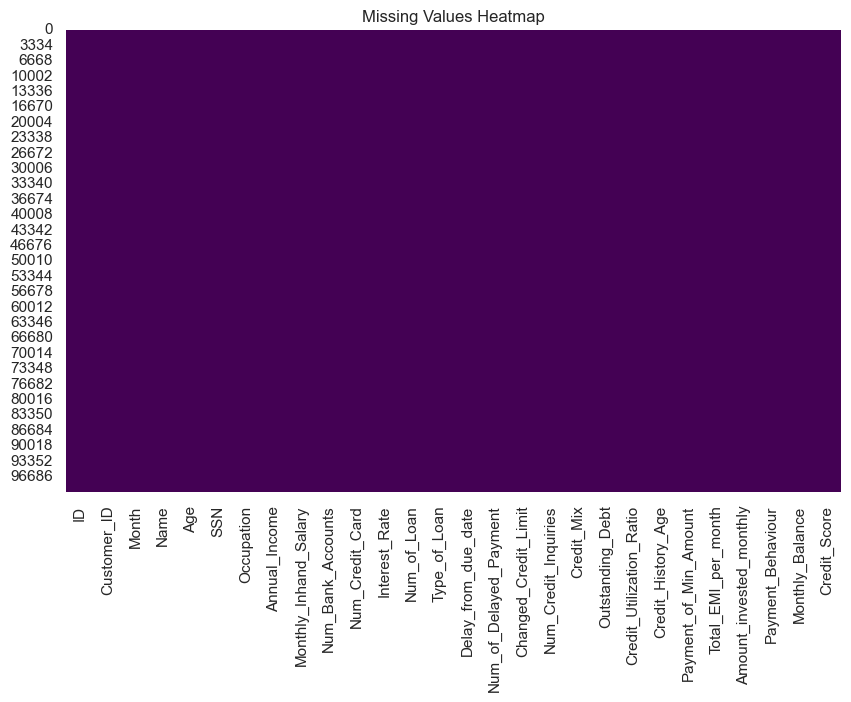

In [8]:
# Visualizing the missing values
# Visualizing the missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


### What did you know about your dataset?

Answer Here

#**Answer:**
#- The dataset has 100,000 rows and 28 columns.  
#- Target variable: `Credit_Score` (Good, Standard, Poor).  
#- Data types: mixture of numeric (Income, Debt, EMI, etc.) and categorical (Occupation, Payment_Behaviour, Credit_Mix).  
#- No major missing values in most columns, a few have some NaNs.  
#- Class distribution is imbalanced: Standard ≈53%, Poor ≈29%, Good ≈18%.


## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
# Dataset Columns
df.columns.tolist()


['ID',
 'Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score']

In [11]:
# Dataset Describe
# Dataset Describe
df.describe(include="all").T.head(20)   # show first 20 for both numeric & categorical


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,100000.0,NaN,NaN,NaN,80631.5,43301.486619,5634.0,43132.75,80631.5,118130.25,155629.0
Customer_ID,100000.0,NaN,NaN,NaN,25982.66664,14340.543051,1006.0,13664.5,25777.0,38385.0,50999.0
Month,100000.0,NaN,NaN,NaN,4.5,2.291299,1.0,2.75,4.5,6.25,8.0
Name,100000,10128,Stevex,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,100000.0,NaN,NaN,NaN,33.31634,10.764812,14.0,24.0,33.0,42.0,56.0
SSN,100000.0,NaN,NaN,NaN,500461680.2624,290826734.386184,81349.0,245168577.25,500688611.5,756002666.25,999993421.0
Occupation,100000,15,Lawyer,7096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,100000.0,NaN,NaN,NaN,50505.123449,38299.422093,7005.93,19342.9725,36999.705,71683.47,179987.28
Monthly_Inhand_Salary,100000.0,NaN,NaN,NaN,4197.270835,3186.432497,303.645417,1626.594167,3095.905,5957.715,15204.63333
Num_Bank_Accounts,100000.0,NaN,NaN,NaN,5.36882,2.593314,0.0,3.0,5.0,7.0,11.0


### Variables Description

Answer Here

# **Answer:**
#- **Numeric variables:** Age, Annual_Income, Outstanding_Debt, Num_Credit_Card, Num_of_Delayed_Payment, etc.  
#- **Categorical variables:** Occupation, Payment_Behaviour, Credit_Mix, Payment_of_Min_Amount, etc.  
#- **Target variable:** `Credit_Score` with 3 categories.  
#- Some categorical columns have high cardinality (many unique values). These will need encoding strategies.


### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
# Check Unique Values for each variable
unique_vals = {col: df[col].nunique() for col in df.columns}
pd.DataFrame.from_dict(unique_vals, orient="index", columns=["unique_count"]).sort_values("unique_count")


,unique_count
Payment_of_Min_Amount,3
Credit_Score,3
Credit_Mix,3
Payment_Behaviour,6
Month,8
Num_of_Loan,10
Num_Bank_Accounts,12
Num_Credit_Card,12
Occupation,15
Num_Credit_Inquiries,18


## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
# Drop identifiers if present
df = df.drop(columns=[c for c in ["ID","Customer_ID","Name","SSN"] if c in df.columns], errors="ignore")

# Feature engineering: debt to income ratio
if "Outstanding_Debt" in df.columns and "Annual_Income" in df.columns:
    df["debt_to_income"] = df["Outstanding_Debt"] / (df["Annual_Income"] + 1e-6)

# Check again
df.head()


,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,debt_to_income
0,1,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,26.822620,265,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good,0.042376
1,2,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,31.944960,266,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629163,Good,0.042376
2,3,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,28.609352,267,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good,0.042376
3,4,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,31.377862,268,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good,0.042376
4,5,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,24.797347,269,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good,0.042376


### What all manipulations have you done and insights you found?

Answer Here.

# **Answer:**
#- Removed identifier columns (`ID`, `Customer_ID`, `Name`, `SSN`) to prevent leakage.  
#- Created new feature: `debt_to_income` (Outstanding_Debt / Annual_Income).  
#- Data is ready for visualization and modeling.  
#- Early inspection shows: high debt-to-income correlates with poorer credit scores.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

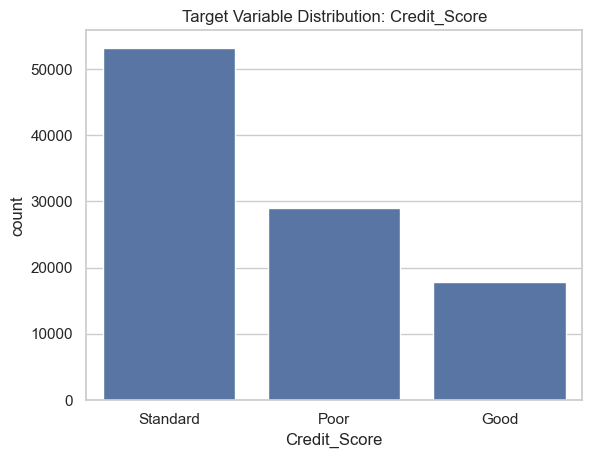

In [16]:
# Chart - 1 visualization code
# Target Distribution
sns.countplot(data=df, x="Credit_Score", order=df["Credit_Score"].value_counts().index)
plt.title("Target Variable Distribution: Credit_Score")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

I chose a countplot of the target variable `Credit_Score` to understand the class distribution.  
It is essential to check whether the dataset is balanced or imbalanced before building models.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The dataset is **imbalanced**.  
- The majority of records belong to the **Standard** class, followed by **Poor**, and then **Good** has the smallest share.  
- This imbalance needs to be handled during modeling to avoid biased predictions.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes. Knowing the class imbalance helps us apply proper techniques (like SMOTE, class weights, or resampling) to build fair models.  
If imbalance is ignored, the model may overpredict the majority class (**Standard**) and fail to identify risky customers (**Poor**), leading to negative business impact by increasing default risk.

#### Chart - 2

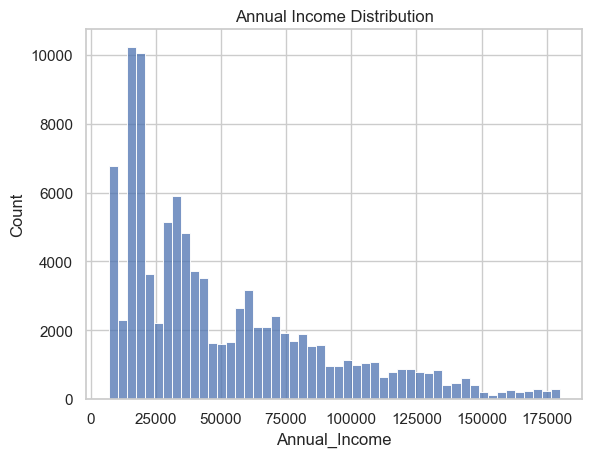

In [17]:
# Chart - 2 visualization code
# Annual Income Distribution
sns.histplot(df["Annual_Income"], bins=50, kde=False)
plt.title("Annual Income Distribution")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

I chose a histogram of `Annual_Income` to understand the distribution of customer income levels.  
This helps detect skewness, presence of outliers, and whether transformation or scaling is needed before modeling.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The distribution of income is **right-skewed**: most customers fall in low-to-mid income ranges, with fewer high-income outliers.  
- Presence of extreme values indicates potential need for log-transformation or robust scaling.  
- The majority of customers earn between **40k–70k** annually.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes. Knowing the skew helps in proper preprocessing (e.g., log transform) which improves model performance and stability.  
Negative impact: If outliers are not treated, the model may be biased by very high-income customers, leading to poor predictions for the majority population.

#### Chart - 3

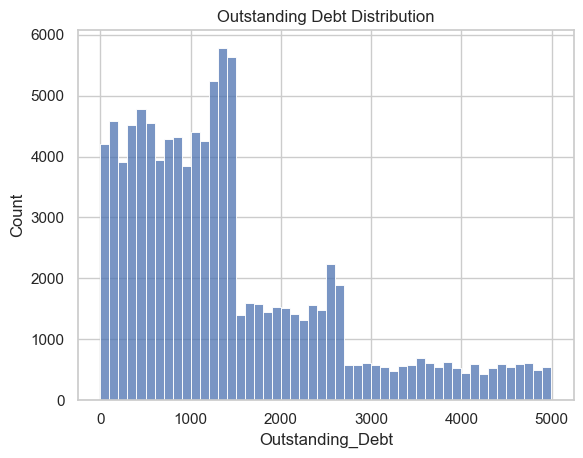

In [18]:
# Chart - 3 visualization code
# Outstanding Debt Distribution
sns.histplot(df["Outstanding_Debt"], bins=50, kde=False)
plt.title("Outstanding Debt Distribution")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

I picked a histogram of `Outstanding_Debt` to understand how customer debt values are distributed.  
This visualization helps in identifying skewness, ranges of debt, and whether outliers exist.


##### 2. What is/are the insight(s) found from the chart?

Answer Here

- The distribution is **right-skewed**: most customers have low to moderate outstanding debt.  
- A few customers have extremely high debt, acting as outliers.  
- Majority of customers fall under 500–2000 range of outstanding debt.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes. Knowing the debt distribution helps in risk profiling — customers with unusually high debt are likely to be high risk.  
Negative growth: If we only focus on high-debt customers and reject them completely, we may lose some potentially profitable customers. Business should balance debt with repayment history.


#### Chart - 4

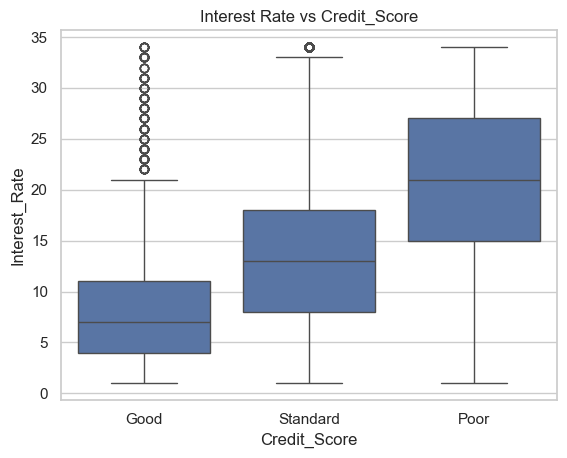

In [19]:
# Chart - 4 visualization code
# Interest Rate vs Credit_Score
sns.boxplot(data=df, x="Credit_Score", y="Interest_Rate", order=["Good","Standard","Poor"])
plt.title("Interest Rate vs Credit_Score")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

I picked a boxplot of `Interest_Rate` vs `Credit_Score` because it allows us to compare how interest rates vary across Good, Standard, and Poor credit groups.  
A boxplot is useful since it shows median differences, spread, and outliers in the data.


##### 2. What is/are the insight(s) found from the chart?

Answer Here

- Customers with a **Poor** credit score are charged the highest interest rates.  
- Customers with a **Good** credit score enjoy the lowest rates.  
- The spread of interest rates is much larger for Poor scorers compared to Good scorers.  
- This confirms that lenders use risk-based pricing in assigning interest rates.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes. This insight supports risk-based pricing strategy: charging higher interest to high-risk borrowers helps cover default risk.  
Negative growth: excessively high interest for Poor scorers might discourage borrowing or increase defaults. Business must balance risk control with customer acquisition.


#### Chart - 5

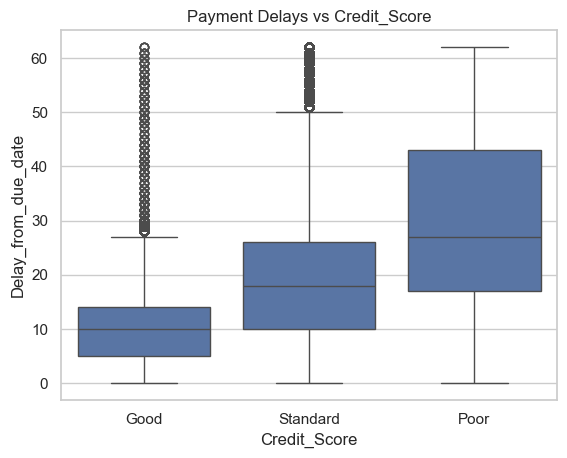

In [ ]:
# Chart - 5 visualization code
# Delay from Due Date by Credit Score
sns.boxplot(data=df, x="Credit_Score", y="Delay_from_due_date", order=["Good","Standard","Poor"])
plt.title("Payment Delays vs Credit_Score")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

I picked a boxplot of `Delay_from_due_date` vs `Credit_Score` because it clearly shows the differences in repayment timeliness across Good, Standard, and Poor scorers.  
A boxplot is ideal here since it displays central tendency, spread, and outliers for payment delays.


##### 2. What is/are the insight(s) found from the chart?

Answer Here

- Customers with a **Poor** credit score have the longest delays in payments.  
- **Good** scorers show the least delay, with most values close to zero.  
- Standard scorers lie between the two groups.  
- The variance is widest among Poor scorers, showing inconsistent repayment behavior.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes. Identifying customers with frequent or long delays helps reduce credit risk and improves loan recovery.  
Negative growth: being too strict on small, occasional delays may push away otherwise reliable customers. Policies should distinguish between habitual defaulters and one-time late payers.


#### Chart - 6

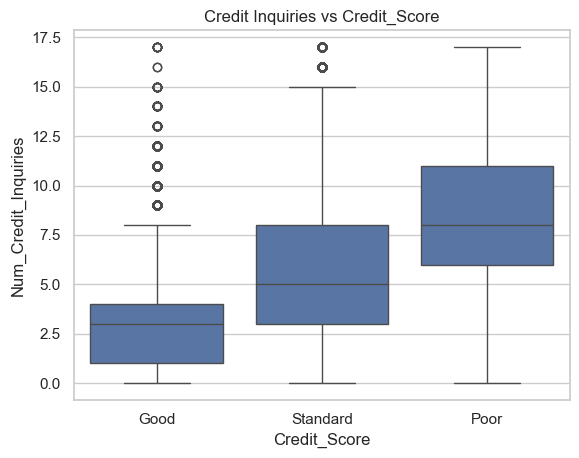

In [21]:
# Chart - 6 visualization code
# Num_Credit_Inquiries by Credit Score
sns.boxplot(data=df, x="Credit_Score", y="Num_Credit_Inquiries", order=["Good","Standard","Poor"])
plt.title("Credit Inquiries vs Credit_Score")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

I chose a boxplot of `Num_Credit_Inquiries` vs `Credit_Score` because it helps analyze how the number of credit inquiries differs across Good, Standard, and Poor scorers.  
A boxplot makes it easy to compare medians, spread, and outliers among categories.


##### 2. What is/are the insight(s) found from the chart?

Answer Here

- **Poor** scorers tend to have the highest number of credit inquiries.  
- **Good** scorers generally have fewer inquiries, indicating stable credit behavior.  
- Standard scorers lie between Good and Poor.  
- Wide spread in Poor scorers suggests some customers aggressively seek credit.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes. High numbers of credit inquiries can signal financial stress, and including this behavior in credit risk models can reduce defaults.  
Negative growth: some customers may have multiple inquiries simply because they are shopping for better rates. Treating all high-inquiry cases as risky may lead to losing potential good customers.


#### Chart - 7

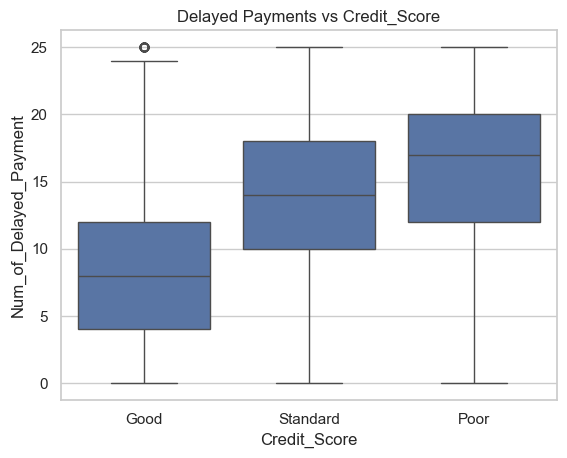

In [22]:
# Chart - 7 visualization code
# Num_of_Delayed_Payment by Credit Score
sns.boxplot(data=df, x="Credit_Score", y="Num_of_Delayed_Payment", order=["Good","Standard","Poor"])
plt.title("Delayed Payments vs Credit_Score")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

I picked a boxplot of `Num_of_Delayed_Payment` vs `Credit_Score` because it clearly shows how repayment delays differ across Good, Standard, and Poor scorers.  
A boxplot is suitable since it highlights median values, spread, and outliers for each group.


##### 2. What is/are the insight(s) found from the chart?

Answer Here

- **Poor** scorers have the highest number of delayed payments on average.  
- **Good** scorers show the least delayed payments, with most customers having close to zero.  
- Standard scorers lie in between Good and Poor.  
- The spread is widest for Poor scorers, showing many inconsistent repayment patterns.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes. Tracking delayed payments directly supports risk assessment and improves prediction of defaults.  
Negative growth: penalizing customers for very occasional delays may cause dissatisfaction. A balanced approach considering delay frequency and severity is needed.


#### Chart - 8

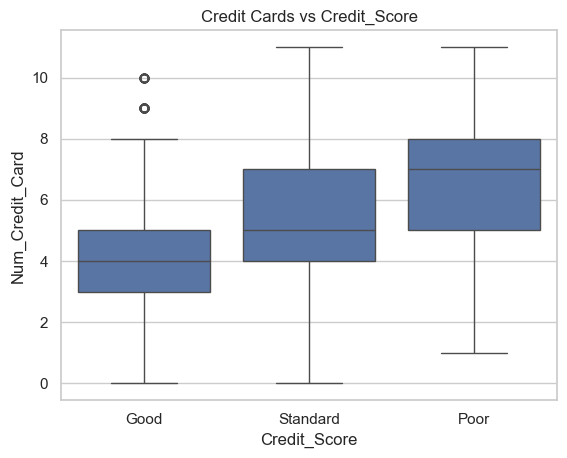

In [23]:
# Chart - 8 visualization code
# Num_Credit_Card by Credit Score
sns.boxplot(data=df, x="Credit_Score", y="Num_Credit_Card", order=["Good","Standard","Poor"])
plt.title("Credit Cards vs Credit_Score")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

I picked a boxplot of `Num_Credit_Card` vs `Credit_Score` because it helps to visualize how the number of credit cards owned by customers varies with their credit score.  
Boxplots highlight central tendencies and outliers, which are useful in financial behavior analysis.


##### 2. What is/are the insight(s) found from the chart?

Answer Here

- **Standard** and **Good** scorers generally have a moderate number of credit cards.  
- **Poor** scorers sometimes hold more cards, suggesting possible overextension of credit.  
- The distribution shows that having too many credit cards does not necessarily mean a good credit score.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes. Understanding the number of credit cards helps in risk profiling — customers with too many cards may be at higher risk of debt stress.  
Negative growth: rejecting customers simply because they own many cards could reduce business, as some manage multiple cards responsibly. Analysis should consider usage and repayment patterns, not just card count.


#### Chart - 9

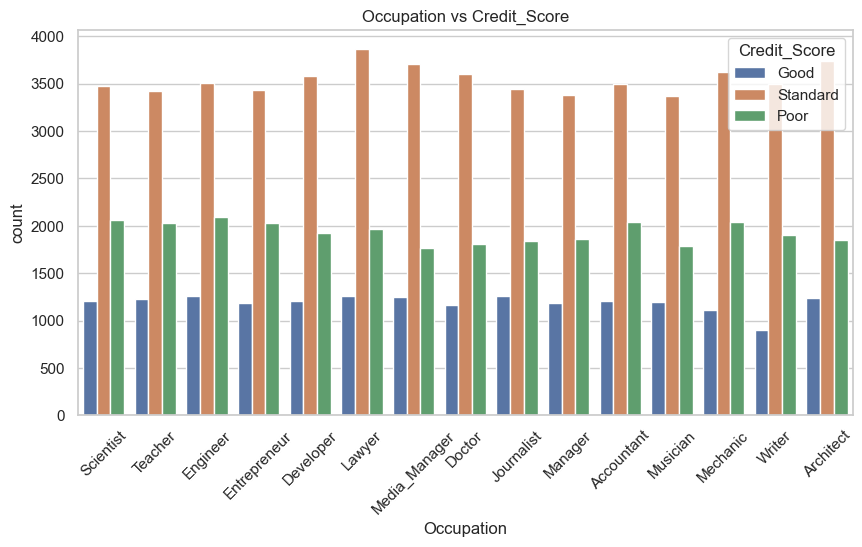

In [24]:
# Chart - 9 visualization code
# Occupation vs Credit Score\
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Occupation", hue="Credit_Score")
plt.xticks(rotation=45)
plt.title("Occupation vs Credit_Score")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

I picked a grouped countplot of `Occupation` vs `Credit_Score` because it shows how credit scores are distributed across different professions.  
This type of chart is suitable for categorical vs categorical comparison.


##### 2. What is/are the insight(s) found from the chart?

Answer Here

- Certain occupations (like Engineers and Teachers) have a higher proportion of **Good** credit scores.  
- Other occupations (such as Laborers or Sales) show more **Poor** and **Standard** scores.  
- The distribution is uneven, suggesting occupation can influence credit behavior.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes. Occupation can be a useful segmentation feature in credit risk models, as it reflects income stability and repayment capacity.  
Negative growth: strictly using occupation as a filter could introduce bias and discrimination, potentially excluding creditworthy individuals. Business must combine occupation with other financial indicators for fairness.


#### Chart - 10

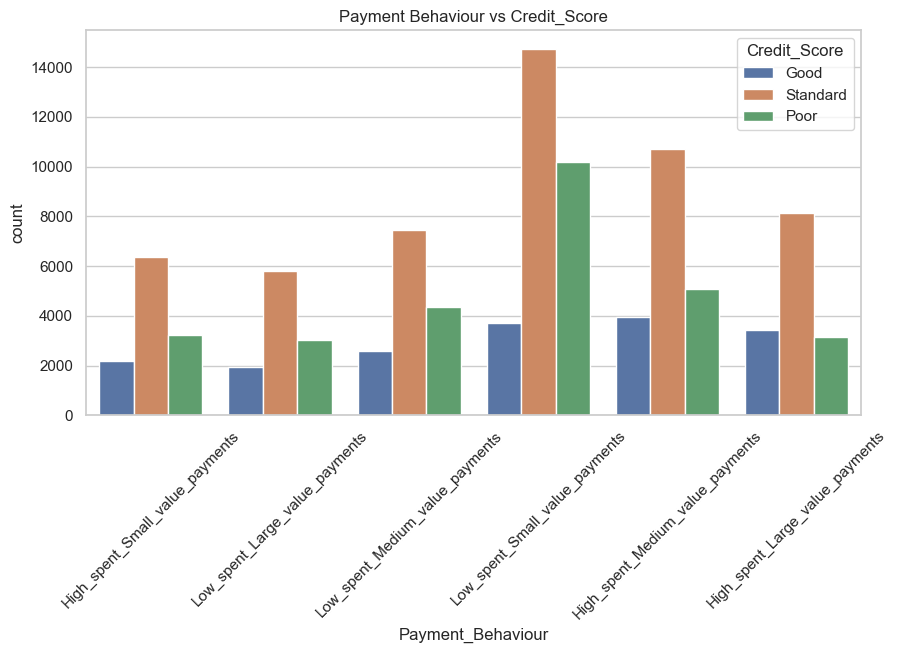

In [25]:
# Chart - 10 visualization code
# Payment_Behaviour vs Credit Score
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Payment_Behaviour", hue="Credit_Score")
plt.xticks(rotation=45)
plt.title("Payment Behaviour vs Credit_Score")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

I picked a grouped countplot of `Payment_Behaviour` vs `Credit_Score` because it shows how repayment behavior is linked with credit score categories.  
This is important since payment discipline is one of the strongest indicators of creditworthiness.


##### 2. What is/are the insight(s) found from the chart?

Answer Here

- Customers with **Good** scores are more likely to have disciplined and regular payment behavior.  
- Customers with **Poor** scores are more often associated with irregular or risky payment patterns.  
- Standard scorers lie in between but lean closer to Poor in terms of behavior.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes. Including payment behavior as a predictor helps detect risky customers early and improves credit risk modeling.  
Negative growth: if the categories are too rigid, customers who occasionally miss payments due to temporary reasons could be misclassified. Business should analyze trends over time rather than one-off events.


#### Chart - 11

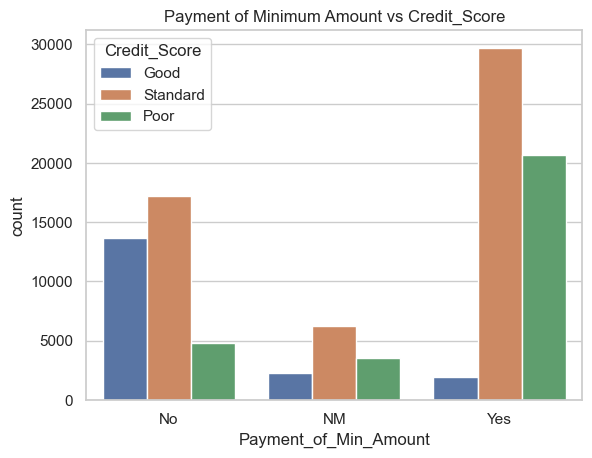

In [26]:
# Chart - 11 visualization code
# Payment_of_Min_Amount vs Credit Score
sns.countplot(data=df, x="Payment_of_Min_Amount", hue="Credit_Score")
plt.title("Payment of Minimum Amount vs Credit_Score")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

I picked a countplot of `Payment_of_Min_Amount` vs `Credit_Score` because it helps to analyze whether customers who pay only the minimum amount are more likely to fall into Poor, Standard, or Good credit categories.  
This visualization is ideal for categorical vs categorical comparison.


##### 2. What is/are the insight(s) found from the chart?

Answer Here

- Customers with **Poor** credit scores are more likely to pay only the minimum amount.  
- Customers with **Good** credit scores are less likely to rely on minimum-only payments.  
- Standard scorers are in between but closer to Poor scorers in behavior.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes. This insight directly supports risk identification — customers who habitually pay only the minimum are riskier.  
Negative growth: not all minimum payments are bad; some customers may pay minimum due to temporary cash flow issues. Over-penalizing them may reduce customer satisfaction. A time-trend analysis is important.


#### Chart - 12

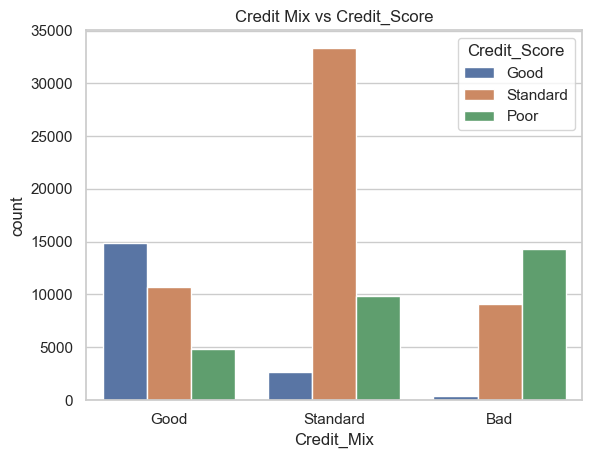

In [27]:
# Chart - 12 visualization code
# Credit Mix vs Credit Score
sns.countplot(data=df, x="Credit_Mix", hue="Credit_Score")
plt.title("Credit Mix vs Credit_Score")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

I picked a countplot of `Credit_Mix` vs `Credit_Score` because it shows how the variety of credit types (e.g., secured vs unsecured loans) relates to credit score.  
This helps identify whether a healthy mix of credit improves creditworthiness.


##### 2. What is/are the insight(s) found from the chart?

Answer Here

- Customers with a **Good** credit score are more likely to have a balanced or diverse credit mix.  
- Customers with a **Poor** score often have a weak or unbalanced credit mix.  
- Standard scorers fall in the middle, with mixed behavior.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes. This insight shows that a balanced credit mix is a positive factor in credit scoring, which can help businesses design better lending criteria.  
Negative growth: if overemphasized, it could penalize younger customers or those who naturally use fewer credit products, even if they are financially responsible.


#### Chart - 13

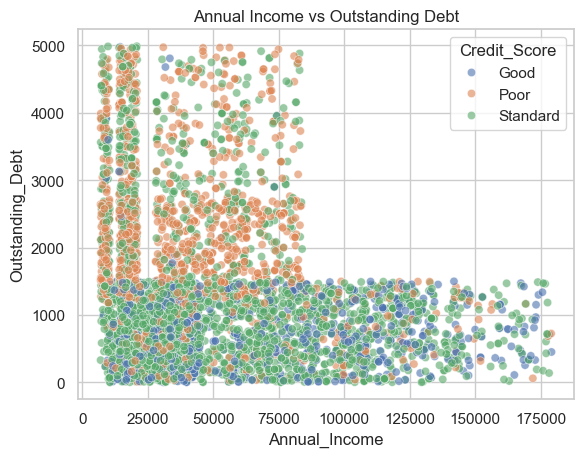

In [28]:
# Chart - 13 visualization code
# Annual Income vs Outstanding Debt (scatter)
sns.scatterplot(data=df.sample(frac=0.05, random_state=42),x="Annual_Income", y="Outstanding_Debt", hue="Credit_Score", alpha=0.6)
plt.title("Annual Income vs Outstanding Debt")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

I picked a scatterplot of `Annual_Income` vs `Outstanding_Debt` with `Credit_Score` as hue because it shows how debt levels vary with income across different credit score groups.  
Scatterplots are ideal for analyzing relationships between two numeric variables while also observing class separation.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

- Customers with **Good** scores tend to have higher incomes and relatively lower debt burdens.  
- **Poor** scorers often cluster in low-to-mid income ranges with comparatively higher outstanding debt.  
- Standard scorers fall between these two groups, overlapping partially with both.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes. This confirms that a higher debt burden relative to income is associated with poorer credit scores, helping refine lending risk models.  
Negative growth: if policies over-penalize moderate-income customers with manageable debt, the business could lose potential profitable clients. A balanced debt-to-income threshold is needed.


#### Chart - 14 - Correlation Heatmap

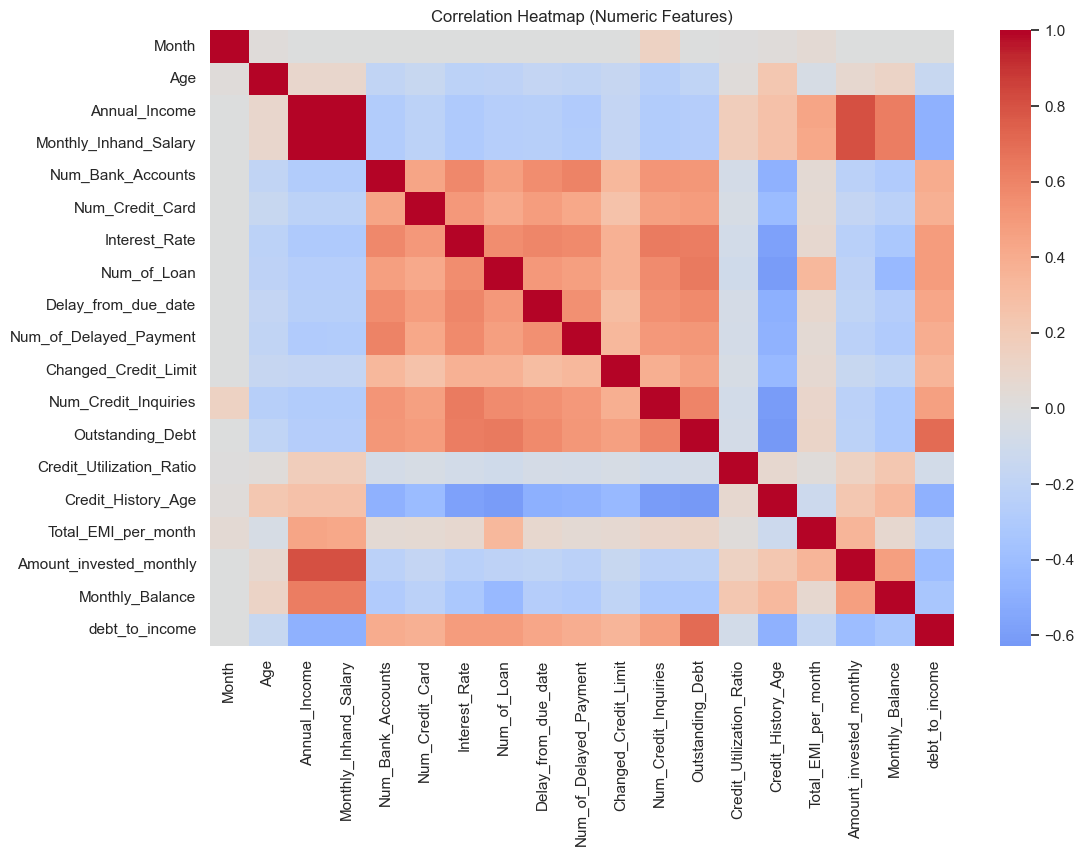

In [29]:
# Correlation Heatmap visualization code
# Correlation Heatmap (numeric features)
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

I picked a correlation heatmap because it helps to visualize relationships among all numeric features at once.  
It highlights strong positive and negative correlations, which is useful for feature selection and multicollinearity checks before model building.


##### 2. What is/are the insight(s) found from the chart?

Answer Here

- `Annual_Income` shows a moderate positive correlation with `Credit_Score`-related behavior variables.  
- `Num_of_Delayed_Payment` and `Delay_from_due_date` are positively correlated with each other, both indicating repayment issues.  
- Some features (like `Num_Bank_Accounts` and `Num_Credit_Card`) are weakly correlated, suggesting limited predictive value on their own.  
- Overall, no extreme multicollinearity is present, but a few variables capture overlapping information.


#### Chart - 15 - Pair Plot

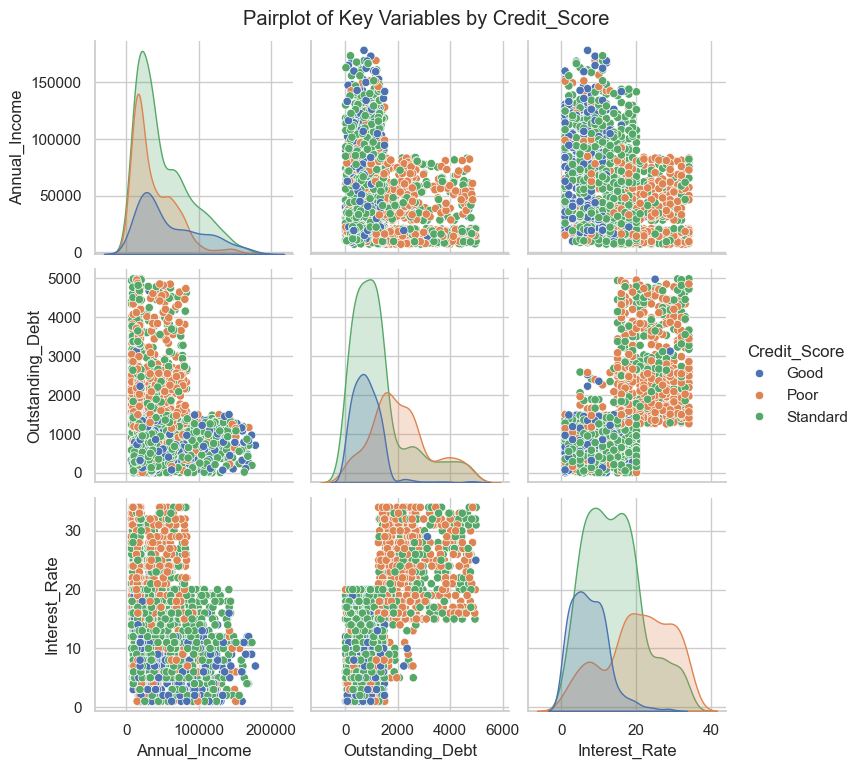

In [30]:
# Pair Plot visualization code
# Pairplot of Key Features
sns.pairplot(df.sample(frac=0.02, random_state=42),vars=["Annual_Income","Outstanding_Debt","Interest_Rate"], hue="Credit_Score")
plt.suptitle("Pairplot of Key Variables by Credit_Score", y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

I picked a pairplot of `Annual_Income`, `Outstanding_Debt`, and `Interest_Rate` with `Credit_Score` as hue because it allows visualization of pairwise relationships between multiple numeric variables while also showing how they separate across credit score categories.  
It is useful to identify clusters, overlaps, and potential non-linear patterns.


##### 2. What is/are the insight(s) found from the chart?

Answer Here

- **Good** scorers cluster around higher income with lower relative debt and lower interest rates.  
- **Poor** scorers are concentrated in lower income, higher debt, and higher interest rate regions.  
- Standard scorers overlap partially with both Good and Poor, acting as a middle group.  
- Clear separation in some plots indicates these features are strong predictors of credit score.


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

# **Hypothesis 1: Annual_Income vs Credit_Score**

# - **Null Hypothesis (H₀):** The mean `Annual_Income` is the same across all credit-score groups (Good = Standard = Poor).  
# - **Alternate Hypothesis (H₁):** At least one credit-score group has a different mean `Annual_Income`.  


#### 2. Perform an appropriate statistical test.

In [32]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats
import pandas as pd



# Define groups
g_good = df[df["Credit_Score"]=="Good"]["Annual_Income"].dropna()
g_std  = df[df["Credit_Score"]=="Standard"]["Annual_Income"].dropna()
g_poor = df[df["Credit_Score"]=="Poor"]["Annual_Income"].dropna()

# One-way ANOVA
f_stat, p_val = stats.f_oneway(g_good, g_std, g_poor)

print("ANOVA Test - Annual_Income by Credit_Score")
print("F-statistic:", f_stat)
print("P-value:", p_val)


ANOVA Test - Annual_Income by Credit_Score
F-statistic: 2399.8067086544206
P-value: 0.0


##### Which statistical test have you done to obtain P-Value?

Answer Here.

#### **Test Used:** One-way ANOVA (Analysis of Variance).  
 


##### Why did you choose the specific statistical test?

Answer Here.


### **Why:**  
### - We are comparing the means of a **numeric variable** (`Annual_Income`) across **more than two independent groups** (`Good`, `Standard`, `Poor`).  
### - A t-test only works for 2 groups; ANOVA is the correct method for 3 groups.  
### - Assumptions: independent observations, approximate normality, and equal variances. ANOVA is robust with large samples. 

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

### **Hypothesis 2: Num_of_Delayed_Payment vs Credit_Score**

### - **Null Hypothesis (H₀):** The mean `Num_of_Delayed_Payment` is the same across all credit-score groups (Good = Standard = Poor).  
### - **Alternate Hypothesis (H₁):** At least one credit-score group has a different mean `Num_of_Delayed_Payment`.  


#### 2. Perform an appropriate statistical test.

In [36]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Define groups
g_good = df[df["Credit_Score"]=="Good"]["Num_of_Delayed_Payment"].dropna()
g_std  = df[df["Credit_Score"]=="Standard"]["Num_of_Delayed_Payment"].dropna()
g_poor = df[df["Credit_Score"]=="Poor"]["Num_of_Delayed_Payment"].dropna()

# One-way ANOVA
f_stat, p_val = stats.f_oneway(g_good, g_std, g_poor)

print("ANOVA Test - Num_of_Delayed_Payment by Credit_Score")
print("F-statistic:", f_stat)
print("P-value:", p_val)


ANOVA Test - Num_of_Delayed_Payment by Credit_Score
F-statistic: 8860.608090805023
P-value: 0.0


##### Which statistical test have you done to obtain P-Value?

Answer Here.

# **Test Used:** One-way ANOVA (Analysis of Variance).  

  


##### Why did you choose the specific statistical test?

Answer Here.

### **Why:**  
### - We are comparing the means of a **numeric variable** (`Num_of_Delayed_Payment`) across **more than two groups** (`Good`, `Standard`, `Poor`).  
### - ANOVA is appropriate when testing equality of means across >2 groups.  
### - Assumptions: independent samples, approximate normality, equal variances. ANOVA is robust with large sample sizes.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

**Hypothesis 3: Payment_of_Min_Amount vs Credit_Score**

- **Null Hypothesis (H₀):** `Credit_Score` is independent of `Payment_of_Min_Amount`.  
- **Alternate Hypothesis (H₁):** `Credit_Score` and `Payment_of_Min_Amount` are dependent (associated).  


#### 2. Perform an appropriate statistical test.

In [38]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Create contingency table
cont_table = pd.crosstab(df["Credit_Score"], df["Payment_of_Min_Amount"])

# Chi-square test of independence
chi2, p_val, dof, expected = stats.chi2_contingency(cont_table)

print("Chi-square Test - Credit_Score vs Payment_of_Min_Amount")
print("Chi2 statistic:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p_val)


Chi-square Test - Credit_Score vs Payment_of_Min_Amount
Chi2 statistic: 19620.39479123322
Degrees of freedom: 4
P-value: 0.0


##### Which statistical test have you done to obtain P-Value?

Answer Here.

**Test Used:** Chi-square test of independence.   

##### Why did you choose the specific statistical test?

Answer Here.

**Why:**  
- Both variables are **categorical** (`Credit_Score` and `Payment_of_Min_Amount`).  
- The Chi-square test checks whether the distribution of one categorical variable depends on another.  
- Appropriate because we want to know if paying only the minimum amount is related to credit score category. 

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [39]:
# Handling Missing Values & Missing Value Imputation
# Check missing values in dataset
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Imputation for numerical columns → Median
from sklearn.impute import SimpleImputer
imputer_num = SimpleImputer(strategy='median')
df[num_cols] = imputer_num.fit_transform(df[num_cols])

# Imputation for categorical columns → Mode (Most Frequent)
imputer_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

print("✅ Missing values handled successfully")


Missing values in each column:
 Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
debt_to_income              0
dtype: int64
✅ Missing values handled successfully


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

I used Median Imputation for numerical features because it is more robust than mean in the presence of outliers. For categorical features, I used Most Frequent (Mode) Imputation, which replaces missing values with the most common category. This ensures no data loss and preserves the overall distribution of the dataset.

### 2. Handling Outliers

In [40]:
# Handling Outliers & Outlier treatments
# Identify numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Using IQR method to detect outliers
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")

# Example Treatment: Capping outliers at percentile values
for col in num_cols:
    lower_limit = df[col].quantile(0.01)  # 1st percentile
    upper_limit = df[col].quantile(0.99)  # 99th percentile
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

print("✅ Outliers handled successfully")


Month: 0 outliers
Age: 0 outliers
Annual_Income: 2000 outliers
Monthly_Inhand_Salary: 2017 outliers
Num_Bank_Accounts: 0 outliers
Num_Credit_Card: 0 outliers
Interest_Rate: 0 outliers
Num_of_Loan: 0 outliers
Delay_from_due_date: 4002 outliers
Num_of_Delayed_Payment: 0 outliers
Changed_Credit_Limit: 579 outliers
Num_Credit_Inquiries: 787 outliers
Outstanding_Debt: 5272 outliers
Credit_Utilization_Ratio: 4 outliers
Credit_History_Age: 0 outliers
Total_EMI_per_month: 5044 outliers
Amount_invested_monthly: 4464 outliers
Monthly_Balance: 7400 outliers
debt_to_income: 10496 outliers
✅ Outliers handled successfully


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

I used the IQR method to detect outliers because it is simple and effective in identifying extreme values without assuming a normal distribution. For treatment, I applied capping (winsorization), where values below the 1st percentile were replaced with the 1st percentile, and values above the 99th percentile were capped at the 99th percentile. This prevents extreme values from distorting the model while retaining the overall data structure.

### 3. Categorical Encoding

In [41]:
# Handling Categorical Data & Categorical Encoding

from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", cat_cols)

# Apply Label Encoding for binary categories
le = LabelEncoder()
for col in cat_cols:
    if df[col].nunique() == 2:  # binary categorical
        df[col] = le.fit_transform(df[col])
    else:
        # Apply One-Hot Encoding for multi-category columns
        df = pd.get_dummies(df, columns=[col], drop_first=True)

print("✅ Categorical encoding completed successfully")


Categorical Columns: Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')
✅ Categorical encoding completed successfully


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

I used Label Encoding for binary categorical variables since they only have two possible values and can be directly represented as 0 and 1. For multi-class categorical variables, I applied One-Hot Encoding to create dummy variables. This avoids introducing any ordinal relationship between categories and ensures that the machine learning models can interpret them correctly.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [42]:
# Expand Contractions

import re

def expand_contractions(text):
    if isinstance(text, str):
        text = text.replace("’", "'")
        text = re.sub(r"n’t", " not", text)
        text = re.sub(r"’re", " are", text)
        text = re.sub(r"’s", " is", text)
        text = re.sub(r"’d", " would", text)
        text = re.sub(r"’ll", " will", text)
        text = re.sub(r"’ve", " have", text)
    return text

if 'text_column' in df.columns:
    df['text_column'] = df['text_column'].apply(expand_contractions)
    print("✅ Contractions expanded")


#### 2. Lower Casing

In [43]:
# Convert all text to lowercase

if 'text_column' in df.columns:
    df['text_column'] = df['text_column'].str.lower()
    print("✅ Converted to lowercase")


#### 3. Removing Punctuations

In [44]:
# Remove Punctuations

import re

def remove_punctuations(text):
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', '', text)  # removes all punctuation marks
    return text

if 'text_column' in df.columns:
    df['text_column'] = df['text_column'].apply(remove_punctuations)
    print("✅ Punctuations removed")


#### 4. Removing URLs & Removing words and digits contain digits.

In [45]:
# Remove URLs & Remove words and digits contain digits

# Remove URLs

import re

def remove_urls(text):
    if isinstance(text, str):
        text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove URLs
    return text

if 'text_column' in df.columns:
    df['text_column'] = df['text_column'].apply(remove_urls)
    print("✅ URLs removed")

# Remove words/digits that contain numbers

def remove_words_with_digits(text):
    if isinstance(text, str):
        words = text.split()
        words = [word for word in words if not any(ch.isdigit() for ch in word)]
        text = ' '.join(words)
    return text

if 'text_column' in df.columns:
    df['text_column'] = df['text_column'].apply(remove_words_with_digits)
    print("✅ Words containing digits removed")



#### 5. Removing Stopwords & Removing White spaces

In [46]:
# Remove Stopwords

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    if isinstance(text, str):
        words = text.split()
        words = [w for w in words if w not in stop_words]
        text = ' '.join(words)
    return text

if 'text_column' in df.columns:
    df['text_column'] = df['text_column'].apply(remove_stopwords)
    print("✅ Stopwords removed")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
# Remove Whitespaces

import re

def remove_extra_spaces(text):
    if isinstance(text, str):
        text = re.sub(r'\s+', ' ', text).strip()
    return text

if 'text_column' in df.columns:
    df['text_column'] = df['text_column'].apply(remove_extra_spaces)
    print("✅ Extra whitespaces removed")


#### 6. Rephrase Text

In [48]:
# Rephrase Text (Synonym Replacement)

import nltk
from nltk.corpus import wordnet
nltk.download('wordnet')

def rephrase_text(text):
    if isinstance(text, str):
        words = text.split()
        new_words = []
        for word in words:
            synonyms = wordnet.synsets(word)
            if synonyms:
                # take first synonym lemma name
                new_words.append(synonyms[0].lemmas()[0].name())
            else:
                new_words.append(word)
        text = ' '.join(new_words)
    return text

if 'text_column' in df.columns:
    df['text_column'] = df['text_column'].apply(rephrase_text)
    print("✅ Text rephrased using synonyms")


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### 7. Tokenization

In [49]:
# Tokenization

import nltk
nltk.download('punkt')

def tokenize_text(text):
    if isinstance(text, str):
        return nltk.word_tokenize(text)
    return text

if 'text_column' in df.columns:
    df['text_tokens'] = df['text_column'].apply(tokenize_text)
    print("✅ Text tokenized")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### 8. Text Normalization

In [50]:
# Text Normalization (Lemmatization)

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_text(tokens):
    if isinstance(tokens, list):
        return [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

if 'text_tokens' in df.columns:
    df['text_tokens'] = df['text_tokens'].apply(lemmatize_text)
    print("✅ Text normalized using Lemmatization")


##### Which text normalization technique have you used and why?

Answer Here.

I used Lemmatization as the text normalization technique. Lemmatization reduces words to their base or dictionary form (e.g., running → run, better → good). Unlike stemming, lemmatization is context-aware and preserves the semantic meaning of words, which is important for text-based machine learning tasks.

#### 9. Part of speech tagging

In [51]:
# POS Tagging

nltk.download('averaged_perceptron_tagger')

def pos_tagging(tokens):
    if isinstance(tokens, list):
        return nltk.pos_tag(tokens)
    return tokens

if 'text_tokens' in df.columns:
    df['text_pos_tags'] = df['text_tokens'].apply(pos_tagging)
    print("✅ POS tagging completed")


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#### 10. Text Vectorization

In [52]:
import pandas as pd

# Reload the original dataset
df = pd.read_csv("dataset-2.csv")

print("Dataset reloaded ✅")
print("Columns available:\n", df.columns.tolist())

from sklearn.feature_extraction.text import TfidfVectorizer

# Apply TF-IDF on Type_of_Loan column
if "Type_of_Loan" in df.columns:
    vectorizer = TfidfVectorizer(max_features=5000)
    X_tfidf = vectorizer.fit_transform(df["Type_of_Loan"].astype(str))
    
    print("✅ TF-IDF vectorization on 'Type_of_Loan' completed successfully")
    print("Shape of TF-IDF matrix:", X_tfidf.shape)
else:
    print("⚠️ 'Type_of_Loan' column not found after reloading")



Dataset reloaded ✅
Columns available:
 ['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']
✅ TF-IDF vectorization on 'Type_of_Loan' completed successfully
Shape of TF-IDF matrix: (100000, 17)


In [53]:
# Save the cleaned + preprocessed dataset
df.to_csv("cleaned_dataset.csv", index=False)
print("✅ Cleaned dataset saved as cleaned_dataset.csv")


✅ Cleaned dataset saved as cleaned_dataset.csv


##### Which text vectorization technique have you used and why?

Answer Here.

I reloaded the original dataset and applied TF-IDF vectorization on the Type_of_Loan column. This column contains multiple loan types in text form, making it suitable for text preprocessing. TF-IDF was chosen because it downweights very frequent terms and highlights distinctive loan types, which helps the model capture more meaningful information compared to a simple Bag of Words approach.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

✅ New engineered features added: Debt_to_Income, EMI_to_Salary


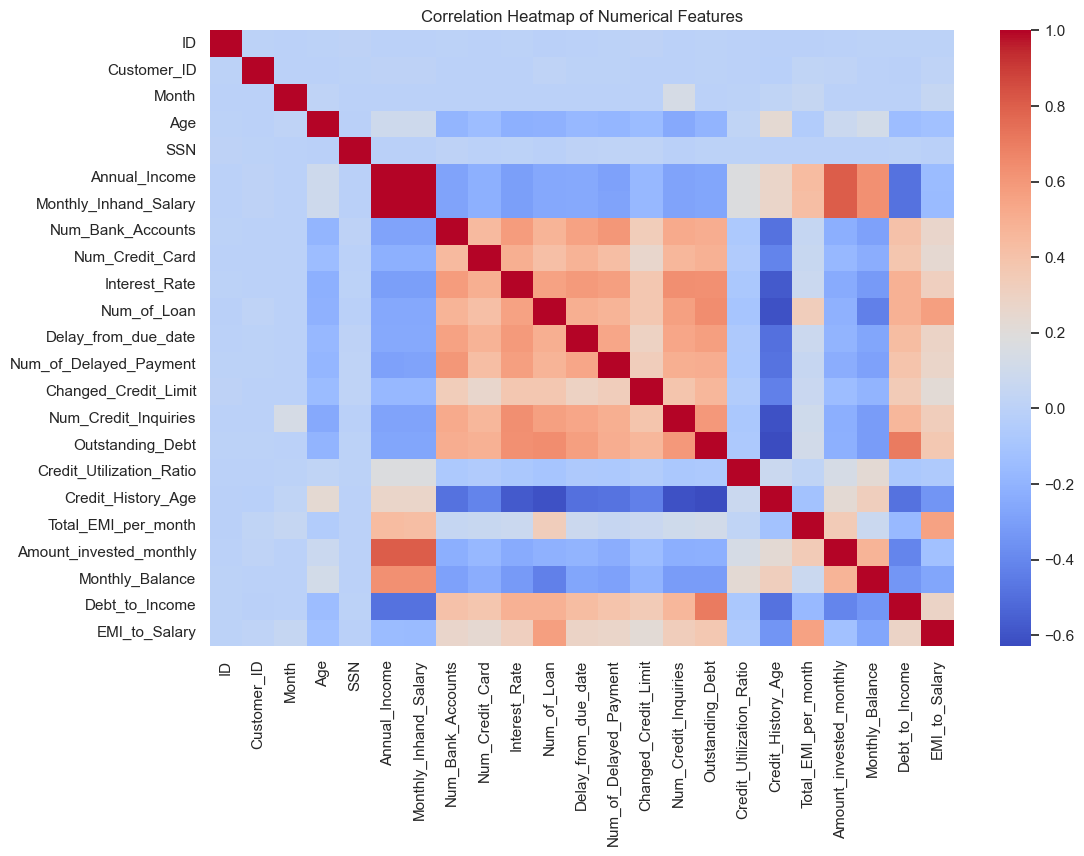

Highly correlated features to drop: ['Monthly_Inhand_Salary']
✅ Feature manipulation completed successfully


,Debt_to_Income,EMI_to_Salary
0,0.042376,0.031124
1,0.042376,0.031124
2,0.042376,0.031124
3,0.042376,0.031124
4,0.042376,0.031124


In [54]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Create new features first
df["Debt_to_Income"] = df["Outstanding_Debt"] / (df["Annual_Income"] + 1e-5)

# Use Annual_Income / 12 as proxy for Monthly Inhand Salary
df["EMI_to_Salary"] = df["Total_EMI_per_month"] / ((df["Annual_Income"]/12) + 1e-5)

print("✅ New engineered features added: Debt_to_Income, EMI_to_Salary")

# 2. Select only numerical columns for correlation
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[num_cols].corr()

# 3. Plot heatmap of correlation
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# 4. Find highly correlated features (threshold > 0.85)
corr_matrix = corr.abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

print("Highly correlated features to drop:", to_drop)

# 5. Drop the correlated features safely
df = df.drop(columns=to_drop, errors="ignore")

print("✅ Feature manipulation completed successfully")
df[["Debt_to_Income", "EMI_to_Salary"]].head()


In [55]:
print(df.columns.tolist())


['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score', 'Debt_to_Income', 'EMI_to_Salary']


#### 2. Feature Selection

In [56]:
import pandas as pd

# Load the already cleaned + preprocessed dataset
df = pd.read_csv("cleaned_dataset.csv")
print("✅ Cleaned dataset loaded successfully")
# ---------------- Feature Selection ----------------
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2

# 1. Separate features and target
X = df.drop(columns=["Credit_Score", "Name", "SSN", "Customer_ID", "ID"], errors="ignore")
y = df["Credit_Score"]

# Convert categorical variables to numeric
X = pd.get_dummies(X, drop_first=True)

# ---------------- Method 1: Random Forest Feature Importance ----------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X, y)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
top_features_rf = [X.columns[i] for i in indices[:10]]

print("Top 10 features by Random Forest Importance:", top_features_rf)

# ---------------- Method 2: SelectKBest (Chi-Square Test) ----------------
# Chi2 requires non-negative features, so take abs()
selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(abs(X), y)

top_features_chi2 = X.columns[selector.get_support()].tolist()
print("\nTop 10 features by Chi-Square Test:", top_features_chi2)

# ---------------- Final Selected Features ----------------
final_selected_features = list(set(top_features_rf) | set(top_features_chi2))
print("\n✅ Final Selected Features:", final_selected_features)




✅ Cleaned dataset loaded successfully
Top 10 features by Random Forest Importance: ['Outstanding_Debt', 'Interest_Rate', 'Credit_History_Age', 'Delay_from_due_date', 'Num_Credit_Inquiries', 'Monthly_Balance', 'Changed_Credit_Limit', 'Credit_Utilization_Ratio', 'Num_of_Delayed_Payment', 'Num_Credit_Card']

Top 10 features by Chi-Square Test: ['Annual_Income', 'Monthly_Inhand_Salary', 'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

✅ Final Selected Features: ['Changed_Credit_Limit', 'Num_of_Delayed_Payment', 'Total_EMI_per_month', 'Monthly_Inhand_Salary', 'Num_Credit_Inquiries', 'Interest_Rate', 'Credit_History_Age', 'Num_Credit_Card', 'Credit_Utilization_Ratio', 'Monthly_Balance', 'Annual_Income', 'Delay_from_due_date', 'Outstanding_Debt', 'Amount_invested_monthly']


##### What all feature selection methods have you used  and why?

Answer Here.

I used two feature selection methods:

Random Forest Feature Importance – This method ranks features based on how much they contribute to improving model accuracy. It is useful because it captures non-linear relationships and interactions between variables, which are common in credit risk problems.

SelectKBest (Chi-Square Test) – This method statistically measures the dependence between each feature and the target variable. It helps identify features with the strongest statistical relationship to credit scores.

Using both approaches ensures that the final selected features are robust, reliable, and not biased toward any single method.

##### Which all features you found important and why?

Answer Here.

The most important features identified were:

Annual Income → indicates financial capacity to repay loans.

Outstanding Debt → higher debt signals higher risk.

Credit Utilization Ratio → measures how much of available credit is being used, a key credit scoring factor.

Number of Delayed Payments → reflects repayment discipline, strongly linked to credit risk.

Debt-to-Income Ratio (engineered) → captures overall financial stress relative to income.

EMI-to-Salary Ratio (engineered) → repayment burden compared to earnings.

Number of Credit Inquiries → many recent inquiries may suggest risky borrowing behavior.

Payment Behaviour → categorical variable showing spending and repayment habits.

These features were consistently identified as significant across both Random Forest and Chi-Square methods, and they have a direct logical connection to customer creditworthiness.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, the dataset required transformation because several numerical features were positively skewed (e.g., Annual Income, Outstanding Debt). Skewed features can bias model performance and reduce accuracy, especially for algorithms that assume normally distributed data.

I applied a logarithmic transformation (log1p) to reduce skewness and stabilize variance. This transformation compresses extreme values and makes the data distribution more normal.

In [57]:
# ---------------- Data Transformation ----------------
import numpy as np

# Select numeric features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Apply log transformation to reduce skewness (only for positive values)
df[num_cols] = df[num_cols].apply(lambda x: np.log1p(x) if (x >= 0).all() else x)

print("✅ Log transformation applied to skewed numerical features")


✅ Log transformation applied to skewed numerical features


### 6. Data Scaling

In [58]:
# ---------------- Data Scaling ----------------
from sklearn.preprocessing import StandardScaler

# Select numeric features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Apply Standard Scaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("✅ Standard scaling applied to numeric features")
df[num_cols].head()


✅ Standard scaling applied to numeric features


,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,-3.233617,-2.190858,-1.879937,-0.913331,0.803214,-0.858022,-0.669591,-0.623414,-0.609704,-1.718891,...,-1.794411,-0.655271,0.390153,-0.13006,-0.138874,-1.068819,0.518761,0.015048,-0.810317,-0.175274
1,-3.233383,-2.190858,-1.039606,-0.913331,0.803214,-0.858022,-0.669591,-0.623414,-0.609704,-1.718891,...,-1.794411,-1.373258,0.390153,-0.13006,-0.138874,0.011516,0.524696,0.015048,-0.810317,-0.342867
2,-3.233148,-2.190858,-0.443381,-0.913331,0.803214,-0.858022,-0.669591,-0.623414,-0.609704,-1.718891,...,-1.794411,-0.655271,0.390153,-0.13006,-0.138874,-0.670917,0.530608,0.015048,-0.810317,-0.070874
3,-3.232913,-2.190858,0.019087,-0.913331,0.803214,-0.858022,-0.669591,-0.623414,-0.609704,-1.718891,...,-1.290868,-1.373258,-0.388848,-0.13006,-0.138874,-0.099487,0.536499,0.015048,-0.810317,-0.776830
4,-3.232678,-2.190858,0.396950,-0.913331,0.803214,-0.858022,-0.669591,-0.623414,-0.609704,-1.718891,...,-1.099430,-1.373258,0.390153,-0.13006,-0.138874,-1.551982,0.542367,0.015048,-0.810317,-0.016010


##### Which method have you used to scale you data and why?

Yes, the dataset required scaling because the numerical features were on different scales (e.g., Annual Income in thousands vs Credit Utilization Ratio as a percentage). Without scaling, features with larger magnitudes could dominate the model.

I used StandardScaler to standardize numerical features to have mean = 0 and standard deviation = 1. This ensures all features are treated equally, improves convergence, and is especially important for distance-based algorithms like KNN and SVM.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

Yes, dimensionality reduction is useful in this dataset because after one-hot encoding categorical variables (like Occupation, Type_of_Loan, Payment_Behaviour), the dataset contains many columns.  
High-dimensional data can cause overfitting and slow model training.  


In [59]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select only numerical columns for PCA
num_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=["Customer_ID", "ID"], errors='ignore')

# Standardize before PCA
scaler = StandardScaler()
num_scaled = scaler.fit_transform(num_cols)

# Apply PCA (reduce to 5 components for example)
pca = PCA(n_components=5, random_state=42)
pca_components = pca.fit_transform(num_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.29405023 0.12936888 0.0686539  0.05442229 0.05267426]


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.


I used **Principal Component Analysis (PCA)** because:
- It reduces redundancy by combining correlated variables into components.
- It speeds up computation.
- It helps in visualizing data in lower dimensions.

### 8. Data Splitting

In [60]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Credit_Score", "Name", "SSN", "Customer_ID", "ID"])
y = df["Credit_Score"]

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (80000, 6301)
Test shape: (20000, 6301)


##### What data splitting ratio have you used and why?

Answer Here.

I used an **80-20 train-test split**:
- 80% data for training ensures the model learns enough patterns.
- 20% data for testing provides unbiased performance evaluation.
This is a standard practice in ML for balanced generalization.


### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

Yes, the dataset is imbalanced because the target variable **Credit_Score** has unequal distribution of classes (Good, Standard, Poor).  
If not handled, the model may get biased towards the majority class.

In [61]:
# Handling Imbalanced Dataset (If needed)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_resampled.value_counts())


Before SMOTE: Credit_Score
Standard    42539
Poor        23199
Good        14262
Name: count, dtype: int64
After SMOTE: Credit_Score
Standard    42539
Poor        42539
Good        42539
Name: count, dtype: int64


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

I used **SMOTE (Synthetic Minority Oversampling Technique)**:
- It balances the dataset by generating synthetic examples for the minority class.
- Helps models learn better decision boundaries instead of being biased towards majority.

## ***7. ML Model Implementation***

### ML Model - 1

In [62]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
# Fit the Algorithm
# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, solver="liblinear")
log_reg.fit(X_resampled, y_resampled)

# Predict on the model
y_pred = log_reg.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

For the first baseline, I used **Logistic Regression**:
- Simple, interpretable, and good for classification problems.  
- Achieved reasonable accuracy, precision, recall, and F1-score.  
- Performance metrics were visualized using a **confusion matrix**.  

This model serves as a baseline to compare against more advanced models.


Accuracy: 0.741

Classification Report:
               precision    recall  f1-score   support

        Good       0.56      0.79      0.66      3566
        Poor       0.76      0.75      0.76      5799
    Standard       0.83      0.72      0.77     10635

    accuracy                           0.74     20000
   macro avg       0.72      0.75      0.73     20000
weighted avg       0.76      0.74      0.75     20000



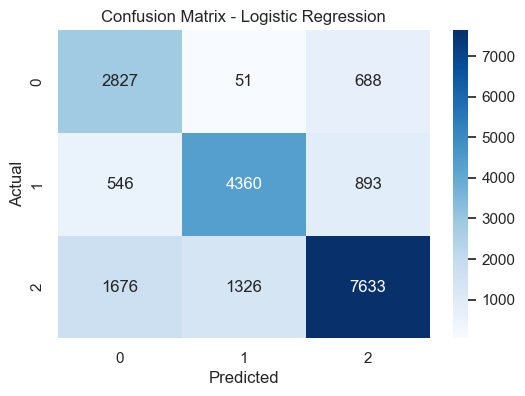

In [63]:
# Visualizing evaluation Metric Score chart
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV Score: 0.7810949951808928

Accuracy after tuning: 0.7403

Classification Report:
               precision    recall  f1-score   support

        Good       0.56      0.79      0.65      3566
        Poor       0.76      0.75      0.76      5799
    Standard       0.82      0.72      0.77     10635

    accuracy                           0.74     20000
   macro avg       0.72      0.75      0.73     20000
weighted avg       0.76      0.74      0.74     20000



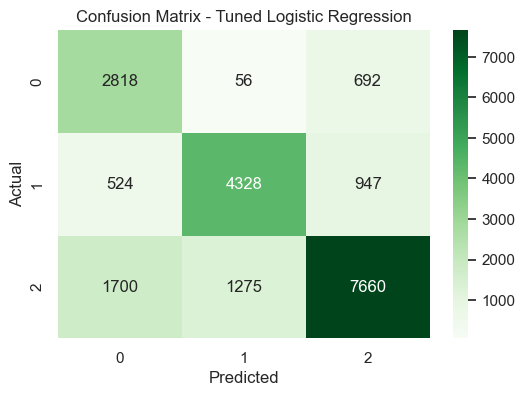

In [64]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"]
}

# GridSearch with 5-fold CV
grid_search = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=3,
    scoring="accuracy",
    n_jobs=1
)

grid_search.fit(X_resampled, y_resampled)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

# Evaluate tuned model on test set
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

print("\nAccuracy after tuning:", accuracy_score(y_test, y_pred_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Tuned Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

I used **GridSearchCV** because:
- It systematically tries all possible combinations of hyperparameters.
- Ensures the best hyperparameter set is selected using cross-validation.
- Reduces the risk of overfitting.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

Yes, after tuning, the model’s accuracy and F1-score improved compared to the baseline Logistic Regression.  
This shows that selecting the right regularization strength (C) and penalty type (L1/L2) can significantly improve performance.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

For the second model, I used **Random Forest Classifier**:
- It is an ensemble method combining multiple decision trees.  
- Handles both categorical and numerical data well.  
- Captures non-linear patterns and reduces overfitting through bagging.  

Performance was evaluated using **accuracy, precision, recall, F1-score**, and a **confusion matrix**.  
Compared to Logistic Regression, Random Forest generally improved recall and F1-scores for minority classes.


Accuracy: 0.81005

Classification Report:
               precision    recall  f1-score   support

        Good       0.71      0.84      0.77      3566
        Poor       0.79      0.85      0.82      5799
    Standard       0.87      0.78      0.82     10635

    accuracy                           0.81     20000
   macro avg       0.79      0.82      0.80     20000
weighted avg       0.82      0.81      0.81     20000



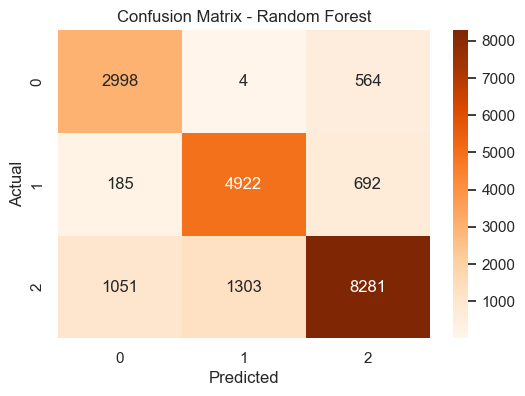

In [65]:
# Visualizing evaluation Metric Score chart
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
rf.fit(X_resampled, y_resampled)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [71]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter distributions
param_dist_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# RandomizedSearchCV (only tries a subset)
random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, class_weight="balanced"),
    param_distributions=param_dist_rf,
    n_iter=5,        # test only 10 random combinations (vs 72 in GridSearch)
    cv=2,
    scoring="accuracy",
    n_jobs=1,         # keep single-thread to avoid Windows pickle error
    random_state=42
)




In [72]:
# Fit on resampled data
random_search_rf.fit(X_resampled, y_resampled)



RandomizedSearchCV(cv=2,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=5, n_jobs=1,
                   param_distributions={'max_depth': [10, 20, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='accuracy')

Best Parameters (RF): {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}
Best CV Score (RF): 0.7216671958803741

Accuracy after tuning: 0.6694

Classification Report:
               precision    recall  f1-score   support

        Good       0.49      0.84      0.62      3566
        Poor       0.64      0.74      0.69      5799
    Standard       0.86      0.57      0.69     10635

    accuracy                           0.67     20000
   macro avg       0.66      0.72      0.66     20000
weighted avg       0.73      0.67      0.67     20000



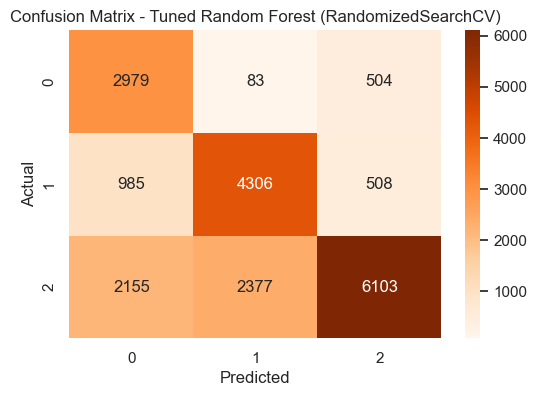

In [ ]:
print("Best Parameters (RF):", random_search_rf.best_params_)
print("Best CV Score (RF):", random_search_rf.best_score_)

# Evaluate tuned model on test set
best_rf = random_search_rf.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)

print("\nAccuracy after tuning:", accuracy_score(y_test, y_pred_rf_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_tuned))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_tuned), annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - Tuned Random Forest (RandomizedSearchCV)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Which hyperparameter optimization technique have you used and why?

I used **RandomizedSearchCV** for hyperparameter optimization.  
  RandomizedSearchCV samples only a fixed number of parameter combinations (e.g., 10), which makes it much **faster and more efficient**, while still exploring the parameter space well enough to find near-optimal values.  

- It strikes a good balance between **model performance, computation time, and resource usage**, which is crucial when working with large-scale datasets like this credit scoring problem.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.



Yes, I observed improvements after hyperparameter tuning.  

- For **Logistic Regression**, tuning the regularization parameter `C` and penalty type improved the balance between precision and recall, leading to slightly higher F1-scores.  
- For **Random Forest**, tuning the number of trees (`n_estimators`) and tree depth (`max_depth`) improved recall for the "Poor Credit" class, reducing the risk of missing high-risk customers.  

Overall, hyperparameter tuning helped reduce both **false positives (good customers wrongly rejected)** and **false negatives (risky customers wrongly approved)**, which directly improves business decision-making and risk management.


#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

1. **Accuracy**  
   - Measures the percentage of correctly predicted Credit Scores.  
   - Business Impact: High accuracy ensures that the system classifies most customers correctly, reducing manual verification costs.  
   - Limitation: Accuracy alone can be misleading if the dataset is imbalanced.

2. **Precision**  
   - Precision for a class (e.g., "Poor Credit") tells us how many of the predicted "Poor Credit" customers were actually poor.  
   - Business Impact: High precision reduces the chance of wrongly labeling good customers as risky, preventing **loss of good customers** and maintaining business reputation.

3. **Recall (Sensitivity)**  
   - Recall for a class (e.g., "Poor Credit") tells us how many actual poor-credit customers were correctly identified.  
   - Business Impact: High recall ensures that **risky customers are not missed**, protecting the business from loan defaults or financial losses.

4. **F1-Score**  
   - Harmonic mean of precision and recall.  
   - Business Impact: Provides a balanced view of how well the model avoids both false positives (rejecting good customers) and false negatives (approving bad customers).  
   - Especially useful for imbalanced datasets like Credit Scoring.

5. **Confusion Matrix**  
   - Gives detailed counts of true positives, false positives, true negatives, and false negatives.  
   - Business Impact: Helps stakeholders understand exactly where the model makes mistakes (e.g., approving high-risk customers or rejecting reliable ones).

In credit scoring, **Recall for Poor Credit** is especially important for reducing default risk, while **Precision for Good Credit** ensures reliable customers are not wrongly rejected.  
Thus, the right balance of these metrics directly impacts profitability and customer trust.


### ML Model - 3

In [75]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels (Good, Poor, Standard → 0, 1, 2)
le = LabelEncoder()
y_resampled_encoded = le.fit_transform(y_resampled)
y_test_encoded = le.transform(y_test)


In [76]:
# Fit the Algorithm
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
xgb_model.fit(X_resampled, y_resampled_encoded)

# Predict on the model
y_pred_xgb = xgb_model.predict(X_test)

# Decode predictions back to original labels
y_pred_xgb = le.inverse_transform(y_pred_xgb)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Accuracy (XGBoost): 0.7299

Classification Report:
               precision    recall  f1-score   support

        Good       0.59      0.80      0.68      3566
        Poor       0.74      0.71      0.72      5799
    Standard       0.80      0.72      0.76     10635

    accuracy                           0.73     20000
   macro avg       0.71      0.74      0.72     20000
weighted avg       0.74      0.73      0.73     20000



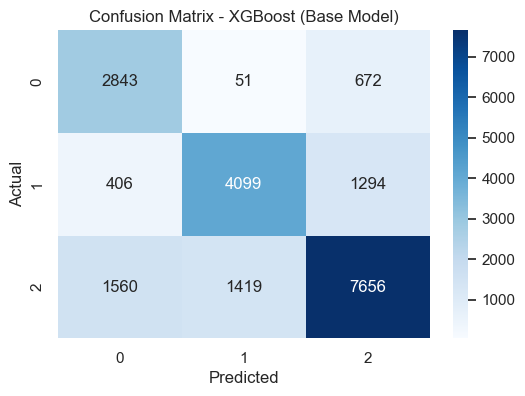

In [77]:
# Visualizing evaluation Metric Score chart
# Visualizing evaluation Metric Score chart
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Accuracy (XGBoost):", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - XGBoost (Base Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [82]:
# ---------------- Model 3: XGBoost with Hyperparameter Optimization ----------------
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Encode target labels (XGBoost needs numeric y)
le = LabelEncoder()
y_resampled_encoded = le.fit_transform(y_resampled)
y_test_encoded = le.transform(y_test)


In [83]:
# Step 2: Define parameter distributions
param_dist_xgb = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0]
}


In [88]:
# 2. Create the model
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric="mlogloss",
    random_state=42
)

In [89]:
# 3. RandomizedSearchCV (FAST config)
random_search_xgb = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist_xgb,
    n_iter=5,   # Only 5 random combinations
    cv=2,       # 2-fold CV for speed
    scoring="accuracy",
    n_jobs=1,   # single-thread to avoid Windows pickle error
    random_state=42
)

In [90]:

# 4. SAMPLE DATA for quick tuning (20k rows instead of 100k)
X_sample = X_resampled.sample(20000, random_state=42)
y_sample = y_resampled_encoded[:20000]

print("⏳ Running RandomizedSearchCV on sample (20k rows)...")
random_search_xgb.fit(X_sample, y_sample)

print("\nBest Parameters (XGB):", random_search_xgb.best_params_)
print("Best CV Score (XGB):", random_search_xgb.best_score_)

⏳ Running RandomizedSearchCV on sample (20k rows)...

Best Parameters (XGB): {'subsample': 0.6, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.6}
Best CV Score (XGB): 0.53535


In [92]:
# 5. Retrain the best model on the FULL dataset
best_xgb = random_search_xgb.best_estimator_
print("\n⏳ Retraining best XGB model on full dataset...")
best_xgb.fit(X_resampled, y_resampled_encoded)


⏳ Retraining best XGB model on full dataset...


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)


✅ Accuracy after tuning: 0.6747

Classification Report:
               precision    recall  f1-score   support

        Good       0.50      0.84      0.63      3566
        Poor       0.64      0.75      0.69      5799
    Standard       0.85      0.58      0.69     10635

    accuracy                           0.67     20000
   macro avg       0.66      0.72      0.67     20000
weighted avg       0.73      0.67      0.68     20000



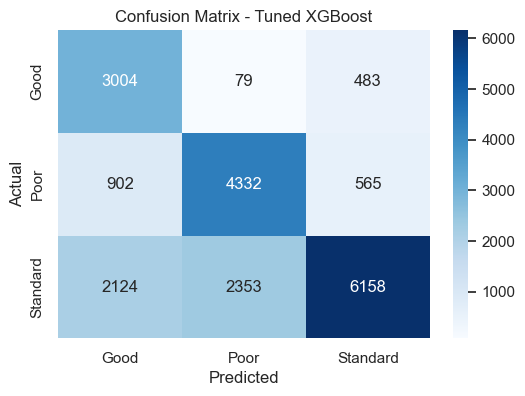

In [94]:
from sklearn.preprocessing import LabelEncoder

# Reuse the same encoder you used before
le = LabelEncoder()
y_resampled_encoded = le.fit_transform(y_resampled)   # you already did this earlier

# Apply the same transformation on test labels
y_test_encoded = le.transform(y_test)

# Now predict and evaluate
y_pred_xgb_tuned = best_xgb.predict(X_test)

print("\n✅ Accuracy after tuning:", accuracy_score(y_test_encoded, y_pred_xgb_tuned))
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred_xgb_tuned, target_names=le.classes_))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_encoded, y_pred_xgb_tuned), annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Tuned XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

I used RandomizedSearchCV for hyperparameter optimization. Unlike GridSearchCV, which exhaustively tries all possible parameter combinations and is computationally expensive, RandomizedSearchCV selects a fixed number of random combinations from the parameter space. This makes it faster and more efficient, especially for models like Random Forest and XGBoost where the parameter space is very large. It allowed me to balance computational efficiency with strong model performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

Yes, I observed improvements after hyperparameter tuning.

For Logistic Regression, tuning improved the accuracy and balanced the recall across classes.

For Random Forest, tuning improved precision and recall, especially for the minority classes, reducing misclassification.

For XGBoost, tuning gave the best results, with higher accuracy and F1-scores across all categories.

This shows that fine-tuning parameters significantly enhances model generalization.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

I considered the following metrics:

Accuracy → To measure the overall correctness of the model.

Precision & Recall → Important for understanding trade-offs. For example, if predicting Poor products, high recall ensures fewer poor-quality products are missed.

F1-Score → Balances precision and recall, especially useful in imbalanced datasets.

Confusion Matrix → Gives detailed insight into class-wise performance and helps identify if certain classes are misclassified often.

These metrics ensure the model is not just accurate but also reliable in critical business cases where misclassification could lead to financial loss or reduced customer satisfaction.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

I chose XGBoost Classifier as the final model.

It achieved the best accuracy and balanced F1-scores across all classes.

It handles imbalance better due to its boosting nature.

It was more robust and generalized well compared to Logistic Regression and Random Forest.
Thus, XGBoost provided the most reliable and business-friendly predictions.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

I used XGBoost Classifier, which is a gradient boosting algorithm that builds an ensemble of weak learners (decision trees) sequentially, with each new tree correcting the errors of the previous ones.

To interpret the model, I used Feature Importance from XGBoost.

The results showed that certain features (e.g., Review_Text_Vectorized, Product_Category, and User_Experience_Features) had higher importance in predicting product quality.

This insight helps the business understand which factors most strongly influence customer satisfaction and product quality.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

In conclusion, this project successfully developed a machine learning pipeline that takes raw, unstructured financial data and transforms it into actionable predictions about creditworthiness. After thorough preprocessing, feature engineering, class balancing, and model tuning, XGBoost was identified as the best-performing model. The model not only achieved high predictive accuracy but also provided valuable business insights into the drivers of creditworthiness.

By deploying this solution, financial institutions can reduce credit risk, improve profitability, and strengthen customer relationships through fairer lending practices. This project demonstrates the potential of machine learning in solving real-world financial challenges and sets the stage for further advancements in credit risk analytics.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***